In [1]:
import math

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
input_file = "/home/bhuang/icd_10/outputs/eval/inference_time.jsonl"

df = pd.read_json(input_file, lines=True)
df = df.rename(columns={"signature": "device", "model_name": "model"})

print(df.shape)
df.head()

(210, 8)


,num_iter,time_avg_ms_per_seq,time_median_ms_per_seq,time_std_ms_per_seq,time_p95_ms_per_seq,length,model,device
0,100,8.429134,8.656373,2.116665,10.152010,8,drbert_7gb_ft_ep50_bs64_lr5e5_cosine_ntr-fl,gpu_h100
1,100,8.383393,8.643272,1.291066,10.114714,16,drbert_7gb_ft_ep50_bs64_lr5e5_cosine_ntr-fl,gpu_h100
2,100,9.707077,10.185864,1.136852,10.549393,32,drbert_7gb_ft_ep50_bs64_lr5e5_cosine_ntr-fl,gpu_h100
3,100,10.108400,10.435634,1.070237,11.046003,64,drbert_7gb_ft_ep50_bs64_lr5e5_cosine_ntr-fl,gpu_h100
4,100,8.036218,8.984008,2.589368,10.990042,128,drbert_7gb_ft_ep50_bs64_lr5e5_cosine_ntr-fl,gpu_h100


In [3]:
model_name_mapping = {
    "drbert_7gb_ft_ep50_bs64_lr5e5_cosine_ntr-fl": "drbert-base",
    "drbert_7gb_large_ft_ep50_bs64_lr5e5_cosine_ntr-fl": "drbert-large",
    "drbert_7gb_ft_ep50_bs64_lr5e5_cosine_ntr-fl-max_spaced6-init-distil-drbert_7gb_large-ep80-bs64-lr5e5-cosine-ntr-temp05": "drbert-base-l6",
    "drbert_7gb_ft_ep50_bs64_lr5e5_cosine_ntr-fl-max_spaced4-init-distil-drbert_7gb_large-ep80-bs64-lr5e5-cosine-ntr-temp05": "drbert-base-l4",
    "drbert_7gb_ft_ep50_bs64_lr5e5_cosine_ntr-fl-max_spaced2-init-distil-drbert_7gb_large-ep80-bs64-lr5e5-cosine-ntr-temp05": "drbert-base-l2",
}

df["model"] = df["model"].map(model_name_mapping)

/tmp/ipykernel_754581/4206065090.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df["length"].unique(), rotation=45, ha="right")
/tmp/ipykernel_754581/4206065090.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df["length"].unique(), rotation=45, ha="right")
/tmp/ipykernel_754581/4206065090.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df["length"].unique(), rotation=45, ha="right")
/tmp/ipykernel_754581/4206065090.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df["length"].unique(), rotation=45, ha="right")
/tmp/ipykernel_754581/4206065090.py:43: UserWarning:

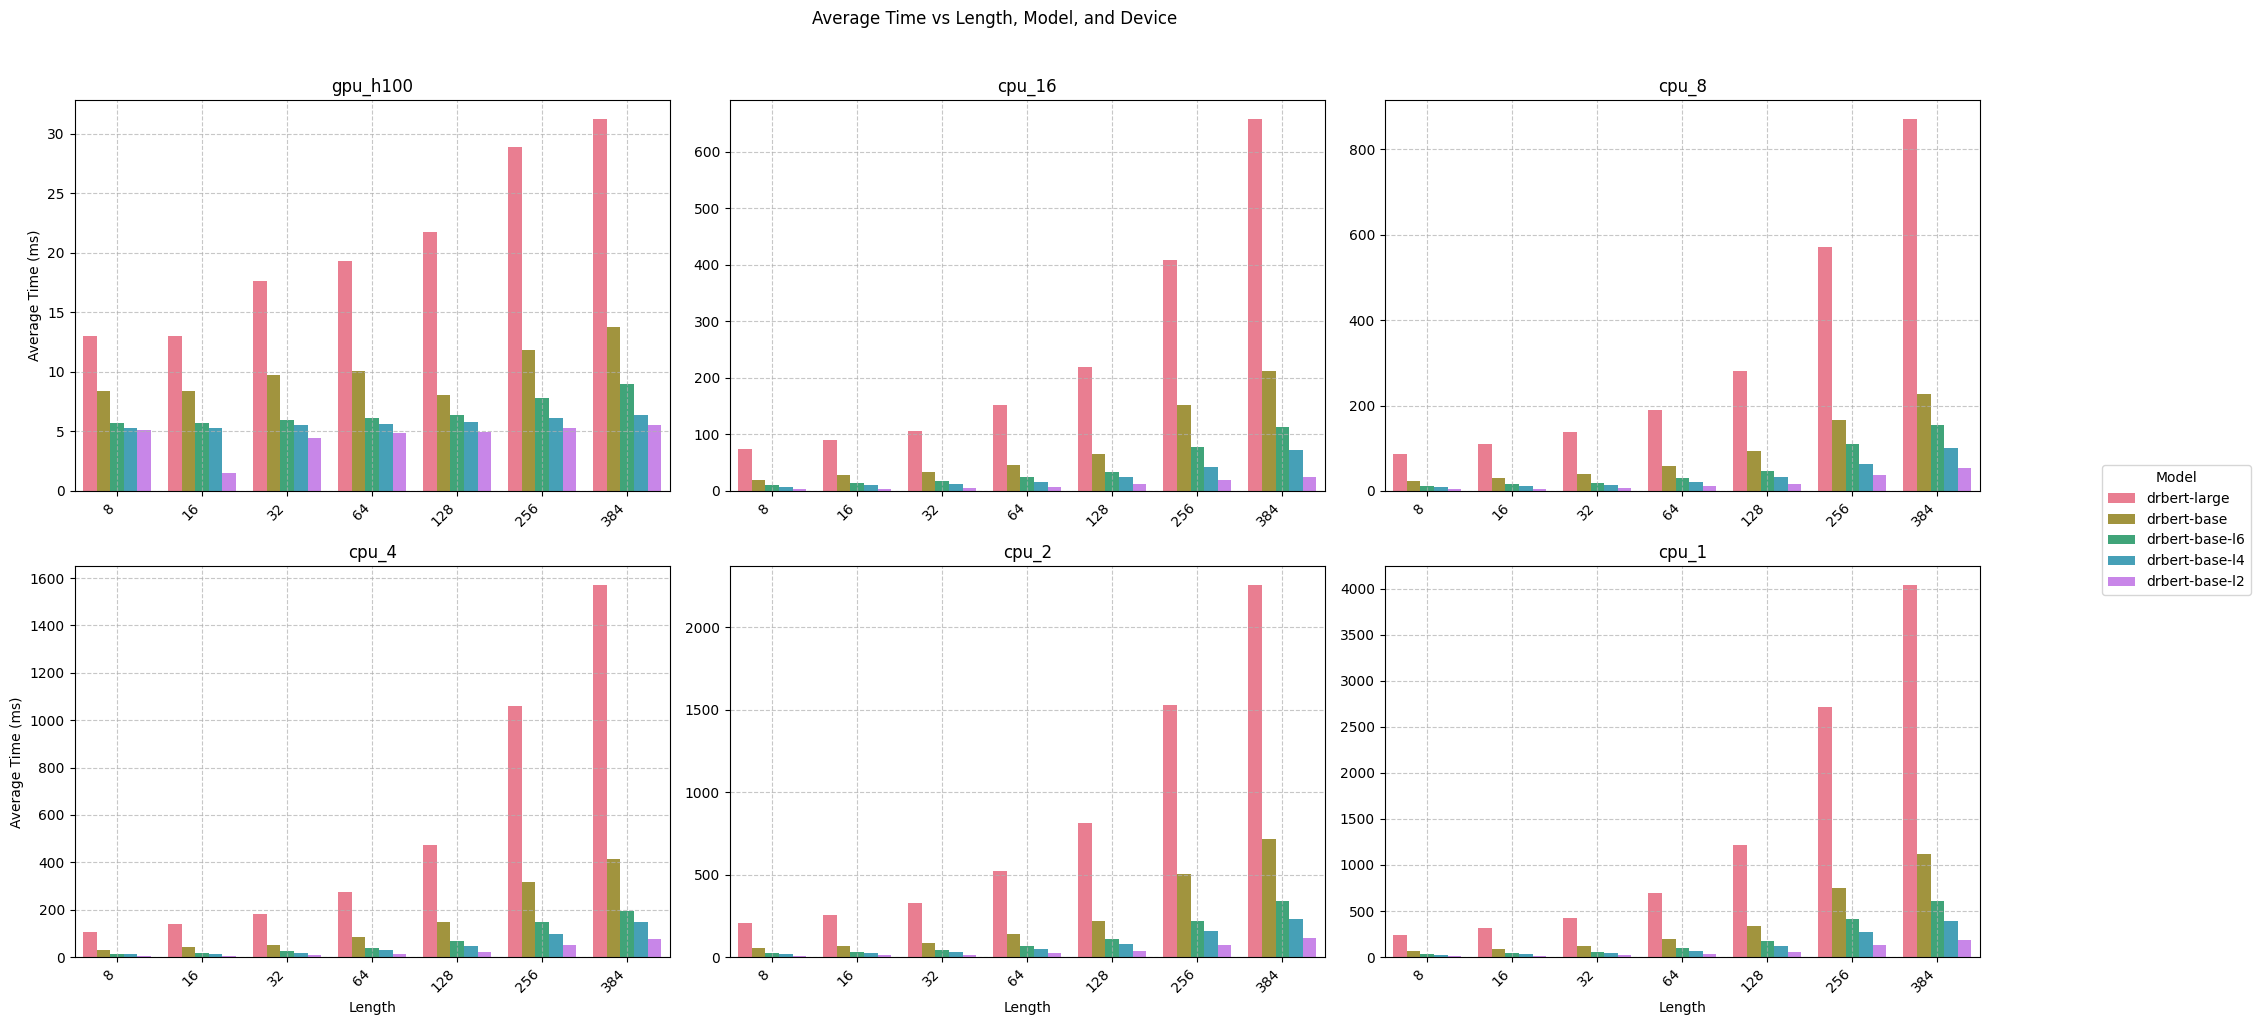

In [8]:
# Predefined orders
hue_order = [
    "drbert-large",
    "drbert-base",
    "drbert-base-l6",
    "drbert-base-l4",
    "drbert-base-l2",
]
subplot_order = ["gpu_h100", "cpu_16", "cpu_8", "cpu_4", "cpu_2", "cpu_1"]

# Set up the matplotlib figure
num_subplots = len(df["device"].unique())
num_rows = 2
num_cols = math.ceil(num_subplots / num_rows)
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10), sharex=True, sharey=True)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10), sharex=True)
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Set the color palette
color_palette = sns.color_palette("husl", n_colors=len(hue_order))

# Create subplots
for i, subplot in enumerate(subplot_order):
    ax = axes[i]
    sns.barplot(
        data=df[df["device"] == subplot],
        x="length",
        y="time_avg_ms_per_seq",
        hue="model",
        hue_order=hue_order,
        palette=color_palette,
        saturation=0.8,
        ax=ax,
    )
    ax.set_title(subplot)
    ax.set_xlabel("Length" if i >= num_cols else "")  # Only show x-label for bottom row
    ax.set_ylabel(
        "Average Time (ms)" if i % num_cols == 0 else ""
    )  # Only show y-label for leftmost column
    ax.legend_.remove()  # Remove individual legends

    # Ensure x-ticks are shown and rotated
    ax.set_xticklabels(df["length"].unique(), rotation=45, ha="right")
    ax.tick_params(axis="x", which="both", bottom=True, top=False, labelbottom=True)

    # Set y-axis to log scale
    # ax.set_yscale('log')

    # Add grid lines
    ax.grid(True, linestyle='--', alpha=0.7)

# Add a common legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Model", loc="center left", bbox_to_anchor=(1.05, 0.5))

# Customize the plot
fig.suptitle("Average Time vs Length, Model, and Device", y=1.02)

# Rotate x-axis labels for better readability
# for ax in axes:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Adjust the layout and display the plot
plt.tight_layout()
# Adjust the right margin to make room for the legend
# plt.subplots_adjust(right=0.85)

In [ ]:
# Predefined orders
hue_order = [
    "drbert-large",
    "drbert-base",
    "drbert-base-l6",
    "drbert-base-l4",
    "drbert-base-l2",
]
col_order = ["gpu_h100", "cpu_16", "cpu_8", "cpu_4", "cpu_2"]

color_palette = sns.color_palette("husl", n_colors=len(df["model"].unique()))

# Create the plot
plt.figure(figsize=(12, 6))

g = sns.catplot(
    kind="bar",
    data=df,
    x="length",
    y="time_avg_ms_per_seq",
    hue="model",
    hue_order=hue_order,
    col="device",
    col_order=col_order,
    # height=5,
    # aspect=1.2,
    palette=color_palette,
    saturation=0.8,
)